## KROK 1: Pobranie danych z API, weryfikacja, zapis do CSV surowych danych


In [184]:
import pandas as pd
import requests
import json 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [185]:
url = 'http://api.nbp.pl/api/exchangerates/tables/A?format=json'

response = requests.get(url)
data = response.json()
print(data)

[{'table': 'A', 'no': '104/A/NBP/2025', 'effectiveDate': '2025-05-30', 'rates': [{'currency': 'bat (Tajlandia)', 'code': 'THB', 'mid': 0.1145}, {'currency': 'dolar amerykański', 'code': 'USD', 'mid': 3.7537}, {'currency': 'dolar australijski', 'code': 'AUD', 'mid': 2.4079}, {'currency': 'dolar Hongkongu', 'code': 'HKD', 'mid': 0.4786}, {'currency': 'dolar kanadyjski', 'code': 'CAD', 'mid': 2.7167}, {'currency': 'dolar nowozelandzki', 'code': 'NZD', 'mid': 2.2338}, {'currency': 'dolar singapurski', 'code': 'SGD', 'mid': 2.9073}, {'currency': 'euro', 'code': 'EUR', 'mid': 4.2507}, {'currency': 'forint (Węgry)', 'code': 'HUF', 'mid': 0.01052}, {'currency': 'frank szwajcarski', 'code': 'CHF', 'mid': 4.5555}, {'currency': 'funt szterling', 'code': 'GBP', 'mid': 5.0552}, {'currency': 'hrywna (Ukraina)', 'code': 'UAH', 'mid': 0.0904}, {'currency': 'jen (Japonia)', 'code': 'JPY', 'mid': 0.026056}, {'currency': 'korona czeska', 'code': 'CZK', 'mid': 0.1704}, {'currency': 'korona duńska', 'code'

In [186]:
df = pd.DataFrame(data[0]['rates'])

df.head()

,currency,code,mid
0,bat (Tajlandia),THB,0.1145
1,dolar amerykański,USD,3.7537
2,dolar australijski,AUD,2.4079
3,dolar Hongkongu,HKD,0.4786
4,dolar kanadyjski,CAD,2.7167


In [187]:
date = data[0]['effectiveDate']
df['date'] = date

df.head()

,currency,code,mid,date
0,bat (Tajlandia),THB,0.1145,2025-05-30
1,dolar amerykański,USD,3.7537,2025-05-30
2,dolar australijski,AUD,2.4079,2025-05-30
3,dolar Hongkongu,HKD,0.4786,2025-05-30
4,dolar kanadyjski,CAD,2.7167,2025-05-30


In [188]:
df.isnull().sum()

currency    0
code        0
mid         0
date        0
dtype: int64

In [189]:
df.describe()

,mid
count,33.000000
mean,1.272692
std,1.646402
min,0.000230
25%,0.090400
50%,0.478600
75%,2.233800
max,5.104600


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currency  33 non-null     object 
 1   code      33 non-null     object 
 2   mid       33 non-null     float64
 3   date      33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [191]:
today =  datetime.today().strftime('%Y-%m-%d')
filename = f'data_raw/kursy_nbp_raw{today}.csv'
df.to_csv(filename, index= False)

## KROK 2: Analiza danych z CSV

Wczytanie pliku CSV

In [192]:
read_file = f'data_raw/kursy_nbp_raw{today}.csv'
df2 = pd.read_csv(read_file)
df2.head()

,currency,code,mid,date
0,bat (Tajlandia),THB,0.1145,2025-05-30
1,dolar amerykański,USD,3.7537,2025-05-30
2,dolar australijski,AUD,2.4079,2025-05-30
3,dolar Hongkongu,HKD,0.4786,2025-05-30
4,dolar kanadyjski,CAD,2.7167,2025-05-30


In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currency  33 non-null     object 
 1   code      33 non-null     object 
 2   mid       33 non-null     float64
 3   date      33 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB


In [194]:
df2.describe()

,mid
count,33.000000
mean,1.272692
std,1.646402
min,0.000230
25%,0.090400
50%,0.478600
75%,2.233800
max,5.104600


In [195]:
clean_data = f'data_processed/clean_data{today}.csv'
df2.to_csv(clean_data,index=False)

TOP 5 najwyższch kursów na dzień analizy

In [196]:
max_value = df2.sort_values(by='mid',ascending=False).head(5)
max_value

,currency,code,mid,date
32,SDR (MFW),XDR,5.1046,2025-05-30
10,funt szterling,GBP,5.0552,2025-05-30
9,frank szwajcarski,CHF,4.5555,2025-05-30
7,euro,EUR,4.2507,2025-05-30
1,dolar amerykański,USD,3.7537,2025-05-30


In [197]:
max_filname = f'reports/top5_max_value{today}.csv'
max_value.to_csv(max_filname,index=False)

TOP 5 najniższych kursów na dzień analizy

In [198]:
min_value = df2.sort_values(by='mid',ascending=True).head(5)
min_value

,currency,code,mid,date
28,rupia indonezyjska,IDR,0.000230,2025-05-30
30,won południowokoreański,KRW,0.002720,2025-05-30
22,peso chilijskie,CLP,0.004010,2025-05-30
8,forint (Węgry),HUF,0.010520,2025-05-30
12,jen (Japonia),JPY,0.026056,2025-05-30


In [199]:
min_filname = f'reports/top5_min_value{today}.csv'
min_value.to_csv(min_filname,index=False)

Kurs waluty EURO


In [200]:
euro = df2[df2['code'] == 'EUR']
print(euro)

  currency code     mid        date
7     euro  EUR  4.2507  2025-05-30


## Krok 3 wizualizacje raportów


In [201]:
max_value

,currency,code,mid,date
32,SDR (MFW),XDR,5.1046,2025-05-30
10,funt szterling,GBP,5.0552,2025-05-30
9,frank szwajcarski,CHF,4.5555,2025-05-30
7,euro,EUR,4.2507,2025-05-30
1,dolar amerykański,USD,3.7537,2025-05-30


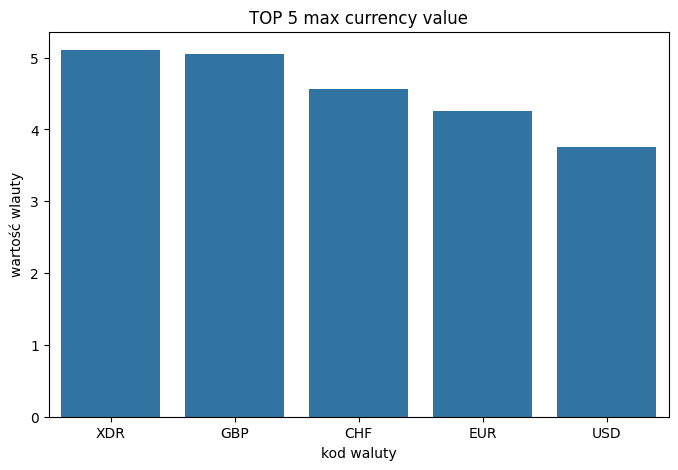

In [202]:
plt.figure(figsize=(8,5))
sns.barplot(data=max_value, x = 'code', y= 'mid')
plt.title('TOP 5 max currency value')
plt.xlabel('kod waluty')
plt.ylabel('wartość wlauty')
plt.savefig(f'visuals/TOP_5_max_value_currency_{today}.png')
plt.show()


In [203]:
min_value

,currency,code,mid,date
28,rupia indonezyjska,IDR,0.000230,2025-05-30
30,won południowokoreański,KRW,0.002720,2025-05-30
22,peso chilijskie,CLP,0.004010,2025-05-30
8,forint (Węgry),HUF,0.010520,2025-05-30
12,jen (Japonia),JPY,0.026056,2025-05-30


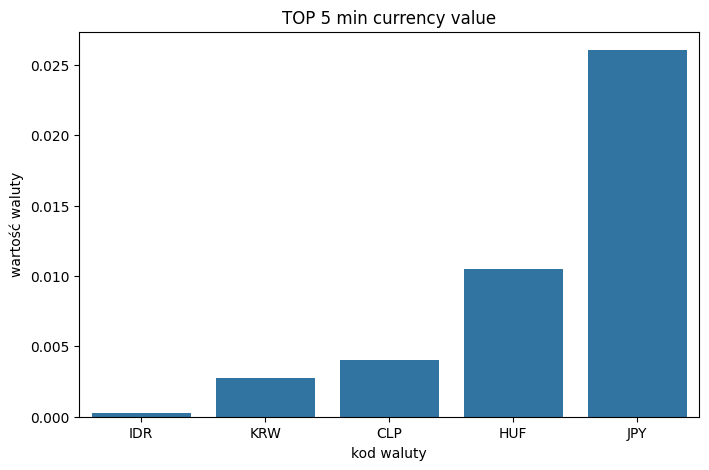

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(data=min_value, x='code', y='mid')
plt.title('TOP 5 min currency value')
plt.xlabel('kod waluty')
plt.ylabel('wartość waluty')
plt.savefig(f'visuals/TOP_5_min_value_currency_{today}.png')
plt.show()
